## Raphael Kaya ; Omar Chaouch

# Algorithmen in der Bioinformatik – Übungsblatt 7
## Abgabe: Freitag, 14.6., 10:30 Uhr

Die Abgabe ist mit bis zu 3 Personen möglich und kann auf Deutsch oder Englisch geschrieben sein. Es muss nur eine Person eines Teams abgeben, in diesem Fall müssen die Namen der Teammitglieder hier in diesem Jupyter Notebook ganz oben genannt werden.

Die praktischen Aufgaben sind mit Python3-Code zu lösen.

Laden Sie das bearbeitete Jupyter Notebook im ILIAS hoch.

**Hinweis:** Sie können eine Bilddatei in ihre Abgabe einbinden, indem Sie test.png durch den entsprechenden Dateinamen ersetzen:

In [ ]:
# simple test() function to check function returns vs. what the function was supposed to return.
def test(got, expected):
    if got == expected:
        prefix = ' OK '
    else:
        prefix = '  X '
    print('%s got: %s expected: %s' % (prefix, repr(got), repr(expected)))

## Aufgabe 7.1 (6 Punkte, 2 + 2 + 1 + 1)

Zeigen Sie, dass Hamilton-Zyklus (abgekürzt HC) aus Foliensatz 6 (Folie 12/89) NP-vollständig ist. Nehmen Sie an, dass bereits gezeigt wurde, dass das Hamilton-Pfad-Problem (abgekürzt HP) NP-vollständig ist, das wie folgt definiert ist:
<hr>

**Eingabe:** Ein ungerichteter Graph $G = (V, E)$.

**Ausgabe:** Enthält $G$ einen Pfad, der alle Knoten genau einmal besucht?

<hr>

In der folgenden Tabelle steht links die allgemeine Vorgehensweise bei einem NP-Vollständigkeitsbeweis, während rechts die konkrete Umsetzung für diese Aufgabe stehen soll. Die folgenden Teilaufgaben beziehen sich auf die entsprechenden Einträge in der rechten Spalte der Tabelle.

| Allgemeine Vorgehensweise | Konkret für diesen Beweis |
| :-------- | :-------- |
| Teil 1 (obere Schranke): Das unbekannte Problem $B$ liegt in NP (also $B$ ist **höchstens** in NP.) Dazu muss gezeigt werden, wie für eine Lösung in Polynomialzeit überprüft werden kann, ob sie stimmt. | siehe Teilaufgabe (a) |
| Teil 2 (untere Schranke): Das bekannte NP-vollständige Problem $A$ ist reduzierbar auf das unbekannte Problem $B$ (Notation: $A \leq_p B$).<br>Dann wissen wir, dass $B$ NP-schwer ist (also $B$ ist **mindestens** in NP). | Wir zeigen HP $\leq_p$ HC. |
| Die Reduktion funktioniert wie folgt: Wir suchen eine Funktion $f$, die in Polynomialzeit die Eingabeinstanz $X$ für $A$ in eine Eingabeinstanz $f(X)$ für $B$ transformiert, sodass gilt:<br>$X$ ist eine Ja-Instanz für $A$ $\Leftrightarrow$ $f(X)$ ist eine Ja-Instanz für $B$.<br>(Wenn ein Algorithmus Problem $B$ lösen kann und dann durch eine "einfache" Transformation auch $A$ lösen kann, dann hat $B$ mindestens dieselbe Komplexität wie $A$ (also ist $B$ mindestens so schwer zu lösen wie $A$).) | $G = (V, E)$ (für HP) muss in Polynomialzeit verändert werden zu $f(G) = G' = (V', E')$ (für HC), sodass gilt:<br>$G$ ist eine Ja-Instanz für HP $\Leftrightarrow$ $G'$ ist eine Ja-Instanz für HC.<br>$ $<br>$ $ |
| Wir definieren ein passendes $f$. | siehe Teilaufgabe (b) |
| Wir prüfen, ob gilt: $A$ hat eine Lösung für $X$ $\Leftarrow$ $B$ hat eine Lösung für $f(X)$. | siehe Teilaufgabe (c) |
| Wir prüfen, ob gilt: $A$ hat eine Lösung für $X$ $\Rightarrow$ $B$ hat eine Lösung für $f(X)$. | siehe Teilaufgabe (d) |
| Teil 3 (Schlussfolgerung): Damit haben wir gezeigt, dass Problem $B$ in NP liegt (**höchstens** in NP) und dass es NP-schwer ist (**mindestens** in NP), woraus folgt, dass $B$ NP-vollständig ist. | Damit haben wir gezeigt, dass HC in NP liegt (**höchstens** in NP) und dass es NP-schwer ist (**mindestens** in NP), woraus folgt, dass HC NP-vollständig ist.

(a) Zeigen Sie zunächst, dass HC in NP liegt. Dazu muss gezeigt werden, wie für eine Lösung in Polynomialzeit überprüft werden kann, ob sie stimmt.

(b) Finden Sie ein geeignetes $f$, das die Eingabe $G = (V, E)$ für HP transformiert zu einer Eingabe $f(G) = G' = (V', E')$ für HC.<br>
In anderen Worten: Sie können beliebig Knoten und Kanten aus $G$ entfernen oder zu $G$ hinzufügen.

(c) Prüfen Sie, ob gilt: $G'$ ist eine Ja-Instanz für HC $\Rightarrow$ $G$ ist eine Ja-Instanz für HP. **Hinweis:** Wenn das nicht gilt, müssen Sie (b) evtl. anders lösen.

(d) Prüfen Sie, ob gilt: $G$ ist eine Ja-Instanz für HP $\Rightarrow$ $G'$ ist eine Ja-Instanz für HC. **Hinweis:** Wenn das nicht gilt, müssen Sie (b) evtl. anders lösen.

# Antwort

a) Die Lösung kann in Polynomialer Zeit mithilfe des folgenden Algorithmus überprürft werden:
Man nimmt die Lösung, also eine Permutation an Knoten. Dabei überprüft man jeweils für jeden Knoten $k_i$ und Folgeknoten Knoten $k_{i+1}$, ob die Kante ($k_i$,$k_{i+1}$), (welche beide verbindet) im Graphen liegt. [Eine Kante liegt im Graphen, sobald $k_{i+1}$ im Graphen liegt.] Zusätzlich muss die Kante $k_n$,$k_1$ überprüft werden, damit sichergestellt wird, dass ein Zyklus besteht. Die Verifikation ist Polynomial, da sie in linearer Zeit stattfindet. Für jeden weiteren Knoten, benötigen wir einen weiteren Schritt, also $n$ Schritte um die Lösung zu verifizieren, wodurch die Verifikation zu einer Komplexität von $O(n)$ führt.

b) Durch hinzufügen eines neuen Knoten $k_{neu}$ zu V, wodurch V' = V $\cup$ $k_{neu}$ und der Erweiterung von E zu E' = E $\cup$ {(s,$k_{neu}$),(t,$k_{neu}$)} mit den neuen Kanten (s,$k_{neu}$),($k_{neu}$,t), wobei s und t Knoten aus V sind, kann ein Zyklus gebildet werden, indem s -> .... -> t -> $k_{neu}$ -> s. Dies ist dann auch ein polynomiales Problem, da die Verifikation polynomial bleibt, wenn wir nur einen Knoten und zwei Kanten hinzufügen.

c) Angenommen, G hat einen Hamilton-Pfad P von s nach t. In G′ kann dieser Pfad P durch Hinzufügen der Kanten (s,$k_{neu}$) und (t,$k_{neu}$) zu einem Hamilton-Zyklus erweitert werden: s→…→t→$k_{neu}$→s. Dies bildet einen Zyklus, der jeden Knoten in V′ genau einmal besucht und zum Startknoten s zurückkehrt.

d) Angenommen, G′ hat einen Hamilton-Zyklus C. Da $k_{neu}$ in G′ nur mit s und t verbunden ist, muss C die Form s→…→t→$k_{neu}$→s haben. Entfernt man $k_{neu}$ und die Kanten (s,$k_{neu}$) und (t,$k_{neu}$), erhält man einen Hamilton-Pfad von s nach t in G.


#### Schlussfolgerung:

HC ist höchstens NP vollständig, was durch einen Verifikationsalgorithmus gezeigt wurde. Durch Transformation von HP, welche NP-Vollstädig ist, zu HC in polynomieller Zeit, konnten wir zeigen, dass HC mindestens in NP liegen muss. Daraus folgt, dass HC NP-vollständig sein muss.


## Aufgabe 7.2 (6 Punkte)

Betrachten Sie das folgende Optimierungsproblem Fixed SCS, welches eine Variante des SCS-Problems aus Foliensatz 6 (Folie 39/89) darstellt:
<hr>

**Eingabe:** Eine Menge $S = \{s_1, \ldots, s_n\}$ mit Strings über einem Alphabet $\Sigma$ und eine Zahl $k \in \mathbb{N}$.

**Ausgabe:** Existiert ein String $s'$ mit $|s'| \leq k$, der alle Strings aus $S$ als Teilstring enthält, wobei $s_1$ der erste in $s'$ vorkommende String ist und $s_n$ der letzte?

<hr>

**Hinweis:** Die restlichen Strings $s_2, \ldots, s_{n-1}$ müssen nicht zwingend in dieser Reihenfolge in $s'$ vorkommen. Nur für den ersten String $s_1$ und letzten String $s_n$ ist das vorgeschrieben. Nehmen Sie außerdem an, dass bereits gezeigt wurde, dass SCS NP-vollständig ist.

Zeigen Sie, dass Fixed SCS NP-vollständig ist. Achten Sie auf eine saubere Beweisführung. Sie können sich an der Tabelle in Aufgabe 7.1 orientieren.

## Antwort

1. Verifizierer in polynomialzeit für Fixed SCS:

    Als Eingabe bekommt der Verifizierer die Menge S und einen String s', sowie eine Zahl $k \in \mathbb{N}$. 

    Zuerst prüft der Verifizierer, dass s' kleiner k ist. $->$ Komplexität von $O(1)$

    Danach geht der Verifizierer durch s' und sucht dort an erster Stelle nach $s_1$ und an der letzten Stelle nach $s_n$.

    Die Komplexität davon ist jeweils die Länge der Teilstrings. Demnach kann die Lösung polynomial verifiziert werden.


2. Funktion f zur Transformation / Reduktion

    Um den String s vom SCS zu einem String s' für den Fixed SCS umzubauen, können wir $s_1$ am Anfang und $s_n$ am Ende einfügen. Dies kann auch mit einem Overlap geschehen, oder eben durch hinzufügen der gesamten Teilstrings. Der Overlap ist möglich kostet aber entsprechend ein wenig mehr Zeit (fraglich ob nötig). Danach muss noch k berechnet werden, welches die Länge $k=| s_1 + s + s_n|$ mit s als String aus SCS. Damit ist der String für den fixed SCS $s'=| s_1 + s + s_n|$ mit einer Länge k. 

    Das geschieht in Polynomialer Zeit, da die Zeit für das Hinzufügen der längeren Teilstrings linear bei der Transformation steigt. 


3. Beweis s SCS $->$ s' fixed SCS

    Angenommen s sei ein String für SCS. Nun fügen wir $s_1$ am Anfang und $s_n$ am Ende hinzu. Damit haben wir s' für fixed SCS gebildet, da die Bedingungen, dass $s_1$ und $s_n$ am Anfang und Ende eingefügt wurden, erfüllt ist. Durch Bildung von $k=| s_1 + s + s_n|$ ist auch die Bedingung, dass die Länge des Strings s' höchstens k ist, erfüllt.


4. Beweis s' fixed SCS $->$ s SCS

    Da $s_1$ und $s_n$ am Anfang bzw. Ende von s' vorkommen und alle anderen Strings aus S als Teilstrings in s' enthalten sind, ist s' auch eine gültige Lösung für SCS.


#### Schlussfolgerung:

Wir konnten durch einen Verifikationsalgorithmus zeigen, dass Fixed SCS höchstens NP-Vollständig sein kann. Durch Transformation vom SCS, welches bekannt NP-Vollständig ist, zu Fixed SCS, konnte gezeigt werden, dass Fixed SCS mindestens NP-Vollständig ist. Daraus resultiert, dass das Fixed SCS NP-Vollständig ist.

## Aufgabe 7.3 (8 Punkte, 4 + 2 + 2)

(a) Zeichnen Sie den Overlap-Graphen für die folgenden 3-mere:
$\{\mathit{GAA, AAA, AAT, ATC, CTC, CTA, TAG}\}$. Zeichnen Sie alle Kanten ein, d. h. auch die mit einem Gewicht von 1.

(b) Führen Sie den Greedy-SCS-Algorithmus (Foliensatz 6, Folie 40/89) auf der angegebenen Stringmenge aus. Geben Sie bei jedem Schritt an, welche Strings zusammengefügt wurden.

(c) Ist das Ergebnis des Greedy-SCS-Algorithmus für diese Eingabe eindeutig? Falls ja: Ist das Ergebnis optimal? Falls nein: Haben die Ergebnisse unterschiedliche Längen?

## Antwort

a)

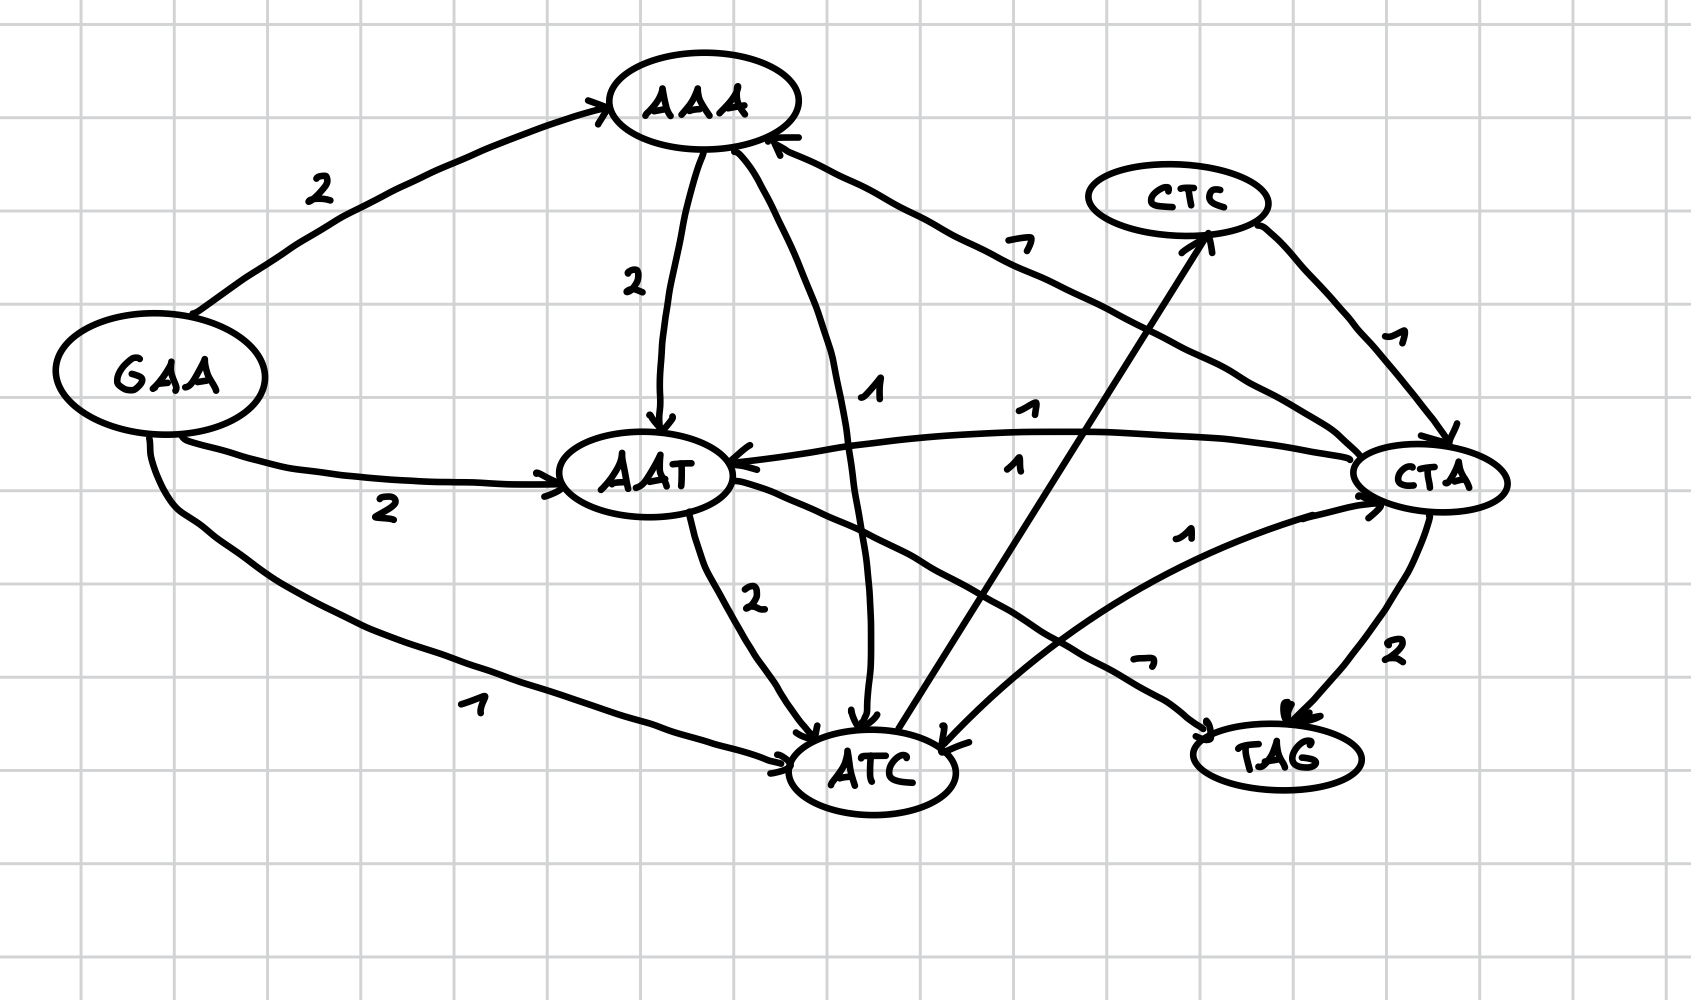

In [1]:
from IPython.display import Image
Image('Overlap.jpeg')

b) 

0. GAA, AAA, AAT, ATC, CTC, CTA, TAG    
1. GAAA - AAT, ATC, CTC, CTA, TAG   
    -> Zusammenfügen von GAA und AAA
2. GAAAT -  ATC, CTC, CTA, TAG         
    -> Zusammenfügen von GAAA und AAT
3. GAAATC - CTC, CTA, TAG               
    -> Zusammenfügen von GAAAT und ATC
4. GAAATCTC - CTA, TAG                 
    -> Zusammenfügen von GAAATC und CTC
5. GAAATCTCTA - TAG                     
    -> Zusammenfügen von GAAATC und CTA
6. GAAATCTCTAG  
    -> Zusammenfügen von GAATCTCTA und TAG

c) Das Ergebnis ist theoretisch nicht ideal, da wir zwei mögliche Kanten direkt vom ersten Knoten nehmen können. Je nachdem, welche der beiden Kanten, die von GAA abgehend mit 2 bewertet wurden genommen wird, erhält man unterschiedliche Längen. Mein Ergebnis hatte eine Länge von 11 und stellt das ideale Ergebnis dar. Wird der andere Weg gewählt, so bekommt man eine Länge von 13. Demnach ist das Ergebnis nicht eindeutig und nicht optimal. Optimal wäre es nur, wenn immer der optimale String, hier der String mit einer Länge von 11 als Ergebnis ausgegeben wird. 